# Note Projet Vaccination:

In [83]:
import pandas as pd
import matplotlib.pyplot as plt


# NETTOYAGE DU FICHIER :

Premier problème avec le fichier. Quand on l'observe sur VS code, on remarque que à partir de la ligne 3070 et jusqu'à la ligne 3541, il y a deux arguments dans la colonne pathologie au lieu d'un. Ce qui est gênant ! On ne peut pas ouvrir le dataset en cet état.

On peut observer cela en regardant la ligne 3070 => embolie pulmonaire est rajoutée.

In [86]:
df = pd.read_csv('C:/Users/Utilisateur/cours-info/Projet-vaccination/donnees-vaccination-par-pathologie.csv', sep=';', on_bad_lines='skip')
df.loc[3070]

date                                                                      2023-01-01
regroupement_pathologie            Maladies respiratoires chroniques, embolie pul...
pathologie                                                        Embolie pulmonaire
region_residence                                                                  84
libelle_region                                                  Auvergne-Rhône-Alpes
departement_residence                                                             03
libelle_departement                                                           Allier
population_ref_cartographie                                                   274670
population_patho_cartographie                                                 1110.0
effectif_1_inj_pathologie                                                     1030.0
effectif_termine_pathologie                                                   1030.0
taux_1_inj_pathologie                                            

On va remplacer le contenu de la colonne "regroupement_pathologie" par "Maladies respiratoires chroniques" de la ligne 3070 à la ligne 3541.

In [88]:
df.loc[3070:3541, df.columns[1]]="Maladies respiratoires chroniques"
df.to_csv('C:/Users/Utilisateur/cours-info/Projet-vaccination/donnees-vaccination-par-pathologie_nettoyé.csv', index=False)

In [144]:
# On peut vérifier que le problème est résolu :
df.loc[3070]

date                                                      2023-01-01
regroupement_pathologie            Maladies respiratoires chroniques
pathologie                                        Embolie pulmonaire
region_residence                                                  84
libelle_region                                  Auvergne-Rhône-Alpes
departement_residence                                             03
libelle_departement                                           Allier
population_ref_cartographie                                   274670
population_patho_cartographie                                 1110.0
effectif_1_inj_pathologie                                     1030.0
effectif_termine_pathologie                                   1030.0
taux_1_inj_pathologie                                          0.926
taux_termine_pathologie                                        0.922
ordre                                                           22.0
effectif_rappel_pathologie        

# ANALYSE DES DONNEES:

Commençons pour le premier histogramme à représenter simplement la distribution du taux de première injection par département pour deux pathologies différentes :

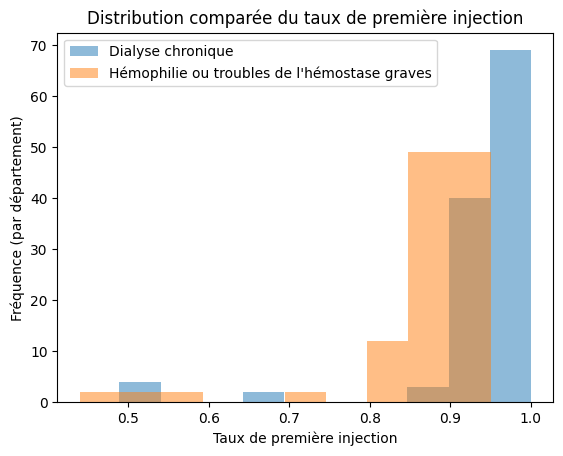

In [146]:
patho_1 = df[df['pathologie'] == "Dialyse chronique"]["taux_1_inj_pathologie"]
patho_2 = df[df['pathologie'] == "Hémophilie ou troubles de l'hémostase graves"]["taux_1_inj_pathologie"]

plt.hist(patho_1, bins=10, alpha=0.5, label='Dialyse chronique')
plt.hist(patho_2, bins=10, alpha=0.5, label="Hémophilie ou troubles de l'hémostase graves")

plt.xlabel('Taux de première injection')
plt.ylabel('Fréquence (par département)')
plt.title('Distribution comparée du taux de première injection')
plt.legend()
plt.show()


## Interprétation :
La distribution du taux de première injection diffère pour les deux pathologies (Plus de vaccination pour la dialyse chronique que pour l'hémophilie ou troubles de l'hémostase graves). Néanmoins, le taux est en moyenne situé aux alentours de 90%, ce que la suite de l'étude nous confirmera.

# TAUX MOYEN DE VACCINATION COMPLETE PAR PATHOLOGIE

Regardons si certaines pathologies se caractérisent par un taux de vaccination inférieur aux autres.

Remarque : Nous décidons d'enlever pour ce point les lignes "Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés" et "Toutes pathologies de la catégorie" qui regroupent plusieurs pathologies apparaissant déjà.

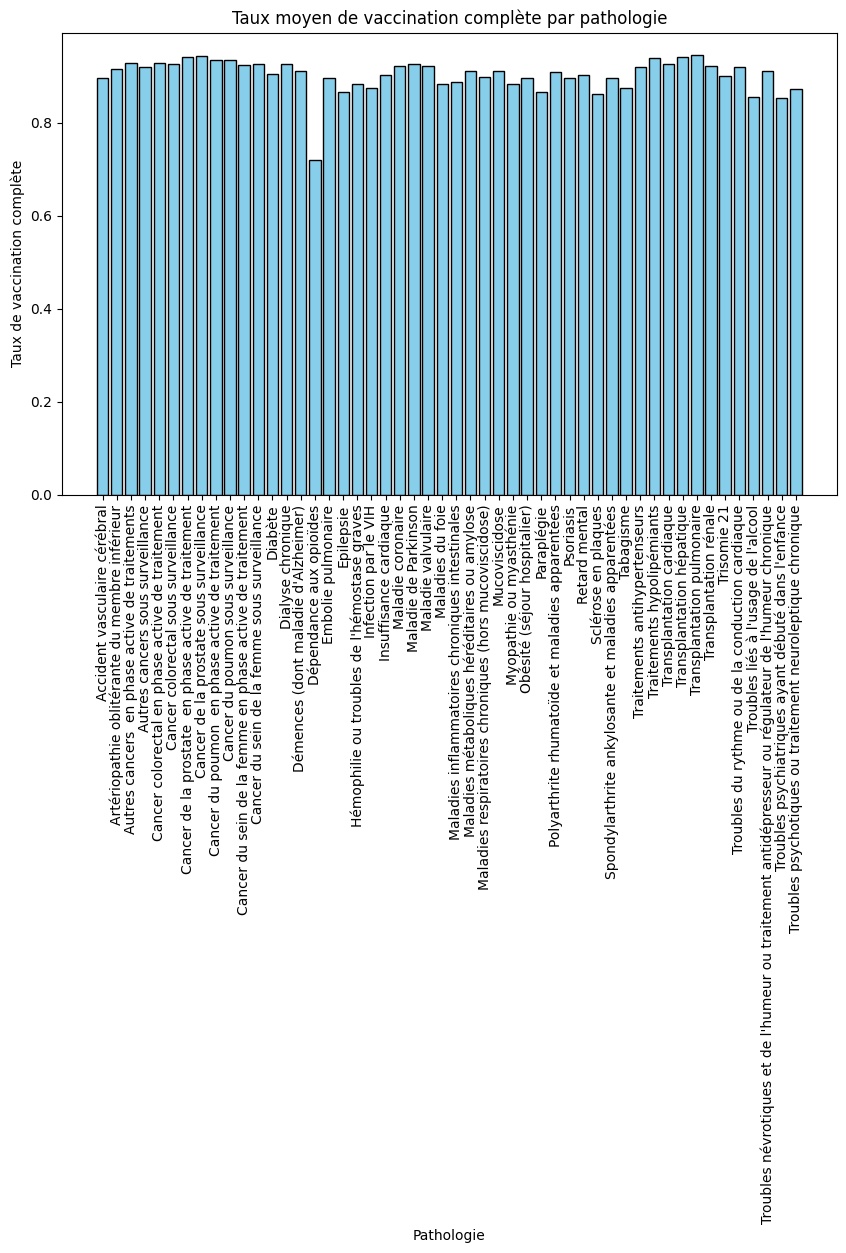

In [36]:
# TAUX MOYEN DE VACCINATION COMPLETE PAR PATHOLOGIE

exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]

pathologie_toute_région= df[df["region_residence"]== "Toute région"]
pathologie_toute_région=pathologie_toute_région[~ pathologie_toute_région['pathologie'].isin(exclusions)]

moyenne_taux_par_patho = pathologie_toute_région.groupby('pathologie')['taux_termine_pathologie'].mean()

plt.figure(figsize=(10, 6))  # Taille du graphique
plt.bar(moyenne_taux_par_patho.index, moyenne_taux_par_patho.values, color='skyblue', edgecolor='black')
plt.xlabel('Pathologie')
plt.ylabel('Taux de vaccination complète')
plt.title('Taux moyen de vaccination complète par pathologie')
plt.xticks(rotation=90)  # On tourne le nom des pathologies pour plus de lisibilité
plt.show()


## Interprétation de l'histogramme : 
Les taux moyens de vaccination pour l'ensemble des pathologies se situent aux alentours de 90% (ce que nous avions vu grossièrement précédemment). Néanmoins, une des pathologies présente un taux inférieur aux autres : la dépendance aux opioïdes, avec un taux de 70%.

Les opioïdes, tels que le fentanyl, l'héroïne, la morphine, sont des substances agissant sur le système nerveux central et provoquent à forte dose une dépendance accrue.

La dépendance aux drogues constitue ainsi un frein à la vaccination. Il peut être intéressant d'étudier les facteurs à l'origine de ce taux inférieur et de l'améliorer.

# TAUX DE VACCINATION PAR REGION:

Maintenant, observons la distribution des taux de vaccination par région et vérifions si certaines sont marquées par un taux inférieur aux autres.

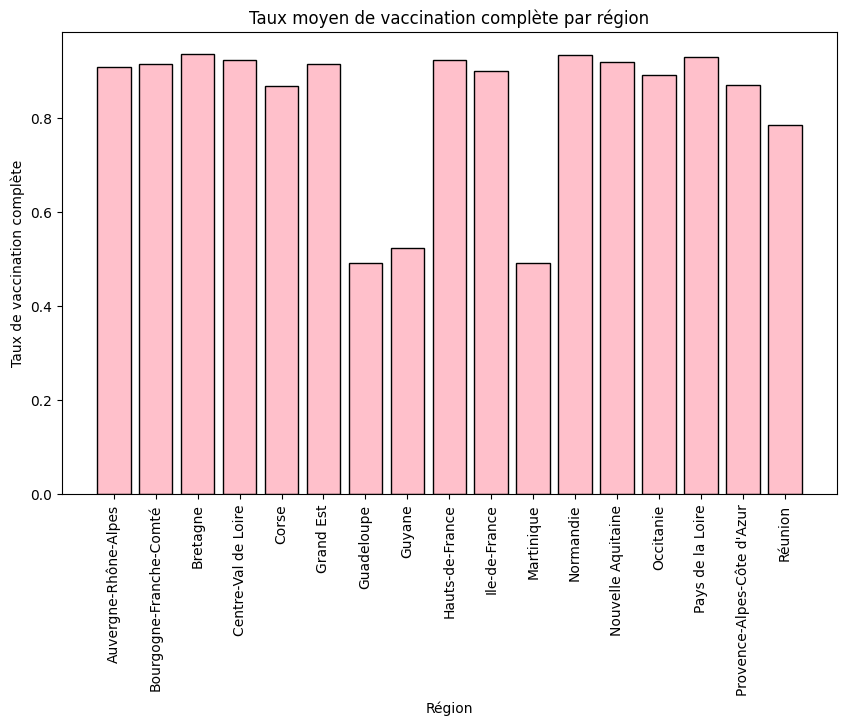

In [43]:
# Taux de vaccination complète par région:

exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]

pathologie_nettoyée=df[~ df['pathologie'].isin(exclusions)]
mask =pathologie_nettoyée["region_residence"] == "Toute région"
pathologie_nettoyée=pathologie_nettoyée[~ mask]
pathologie_nettoyée= pathologie_nettoyée[pathologie_nettoyée['departement_residence']=='Tout département']

moyenne_taux_par_region = pathologie_nettoyée.groupby('libelle_region')['taux_termine_pathologie'].mean()

plt.figure(figsize=(10, 6)) 
plt.bar(moyenne_taux_par_region.index, moyenne_taux_par_region.values, color='pink', edgecolor='black')
plt.xlabel('Région')
plt.ylabel('Taux de vaccination complète')
plt.title('Taux moyen de vaccination complète par région')
plt.xticks(rotation=90)  
plt.show()



In [143]:
moyenne_taux_par_region

libelle_region
Auvergne-Rhône-Alpes          0.906900
Bourgogne-Franche-Comté       0.915000
Bretagne                      0.934780
Centre-Val de Loire           0.923180
Corse                         0.866936
Grand Est                     0.914240
Guadeloupe                    0.490766
Guyane                        0.522978
Hauts-de-France               0.923560
Ile-de-France                 0.899040
Martinique                    0.490935
Normandie                     0.934280
Nouvelle Aquitaine            0.917680
Occitanie                     0.889920
Pays de la Loire              0.929420
Provence-Alpes-Côte d'Azur    0.869160
Réunion                       0.785250
Name: taux_termine_pathologie, dtype: float64

## Interprétation :
Les taux de vaccination plus faibles sont atteints au sein des départements d'Outre-mer. Dans l'ordre : Guadeloupe (49%) Martinique (49%), Guyane (52%) et La Réunion (78%). Les autres régions possèdent un taux de vaccination plutôt de l'ordre de 90%.

Nous comprenons alors que les départements d'Outre-mer sont plus vulnérables à un accès limité à la vaccination. Cela peut s'expliquer par une combinaison de facteurs sociaux, logistiques et économiques.

En effet, les DOM sont marqués par une méfiance historique envers les institutions médicales et une influence religieuse, par un réseau de santé moins développé et par un niveau de vie globalement plus bas qui peut limiter l'accès à l'information sur les vaccins. 

Il est intéressant de remarquer que La Réunion, bien que possèdant un taux de vaccination inférieur à la majorité des autres régions, dépasse largement celui des autres DOM, montrant des stratégies de communication et des infrastructures plus développées.

## Conclusion : 
Il est nécessaire d'adapter les futures stratégies et techniques mises en oeuvre à la réalité locale des départements afin d'améliorer leur couverture sociale.

# TAUX DE VACCINATION PAR DEPARTEMENT :

Affinons notre recherche en nous intéressant aux départements.

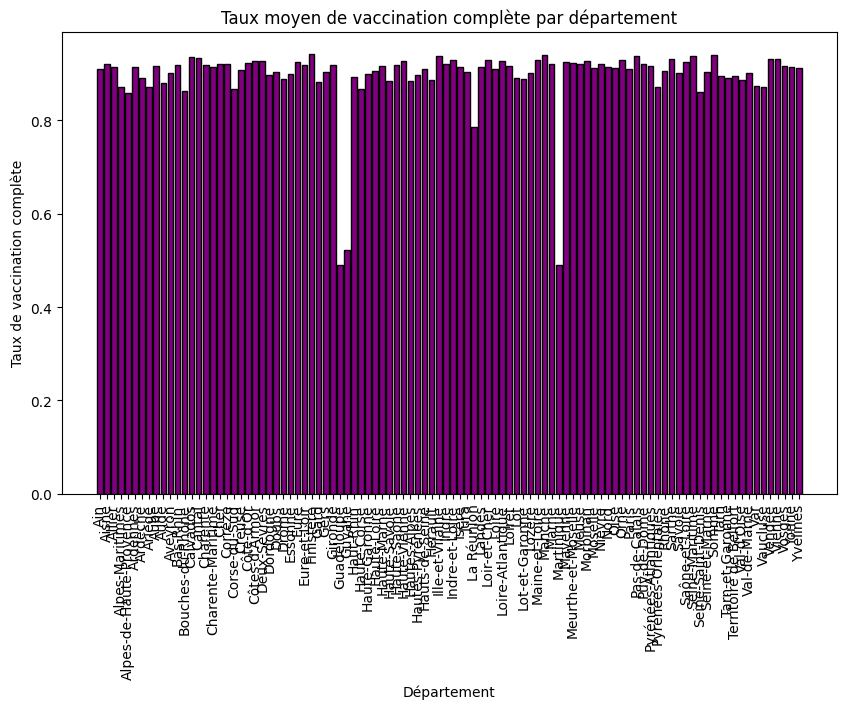

In [44]:
# Taux de vaccination complète par département:

exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]

pathologie_nettoyée=df[~ df['pathologie'].isin(exclusions)]
mask =pathologie_nettoyée['departement_residence']=='Tout département'
pathologie_nettoyée=pathologie_nettoyée[~ mask]

moyenne_taux_par_département = pathologie_nettoyée.groupby('libelle_departement')['taux_termine_pathologie'].mean()

plt.figure(figsize=(10, 6))
plt.bar(moyenne_taux_par_département.index, moyenne_taux_par_département.values, color='purple', edgecolor='black')
plt.xlabel('Département')
plt.ylabel('Taux de vaccination complète')
plt.title('Taux moyen de vaccination complète par département')
plt.xticks(rotation=90) 
plt.show()




Nous ne voyons pas grand chose, outre des taux bien inférieurs pour les départements d'Outre-mer. On peut essayer d'enlever les DOM pour s'intéresser uniquement au cas de la France métropolitaine.

## Remarque :
Nous plaçons un seuil à 90%. Les départements en rouge sont inférieurs au seuil, les départements en bleu en sont supérieurs.

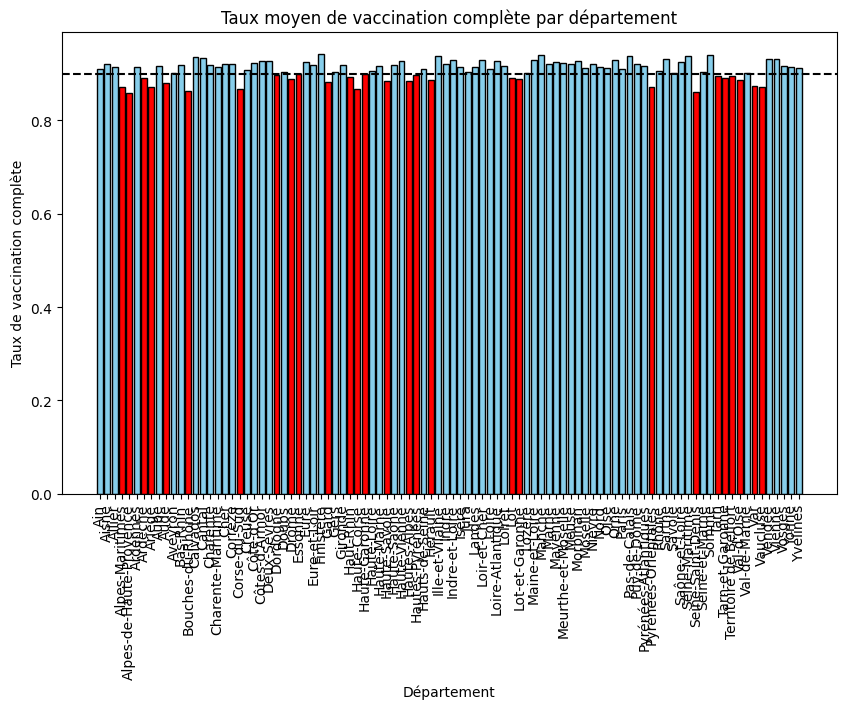

In [59]:
# Taux de vaccination complète par région (excepté les départements hors France métropolitaine):

exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]
hors_France_métro=['Guadeloupe','Guyane','Réunion', 'Martinique']
    
pathologie_nettoyée=df[~ df['pathologie'].isin(exclusions)]
mask =pathologie_nettoyée['departement_residence']=='Tout département'
pathologie_nettoyée=pathologie_nettoyée[~ mask]
pathologie_nettoyée=pathologie_nettoyée[~pathologie_nettoyée['libelle_region'].isin(hors_France_métro)]

moyenne_taux_par_département = pathologie_nettoyée.groupby('libelle_departement')['taux_termine_pathologie'].mean()

seuil = 0.9 # On définit le seuil à 90 %.

# On définit deux couleurs : rouge pour taux bas, bleu pour taux élevés
couleurs = ['red' if taux < seuil else 'skyblue' for taux in  moyenne_taux_par_département.values]

plt.figure(figsize=(10, 6)) 
plt.bar(moyenne_taux_par_département.index, moyenne_taux_par_département.values, color=couleurs, edgecolor='black')
plt.axhline(y=seuil, color='black', linestyle='--', label='Moyenne') # On définit une ligne délimitant le seuil choisi.
plt.xlabel('Département')
plt.ylabel('Taux de vaccination complète')
plt.title('Taux moyen de vaccination complète par département')
plt.xticks(rotation=90) 
plt.show()


On récupère la liste des départements dont le taux de vaccination est en dessous du seuil de 90%.

In [64]:
seuil_inférieur= moyenne_taux_par_département[moyenne_taux_par_département.values < seuil].index.tolist()
seuil_inférieur

['Alpes-Maritimes',
 'Alpes-de-Haute-Provence',
 'Ardèche',
 'Ariège',
 'Aude',
 'Bouches-du-Rhône',
 'Corse-du-Sud',
 'Dordogne',
 'Drôme',
 'Essonne',
 'Gard',
 'Haut-Rhin',
 'Haute-Corse',
 'Haute-Garonne',
 'Haute-Savoie',
 'Hautes-Alpes',
 'Hautes-Pyrénées',
 'Hérault',
 'Lot',
 'Lot-et-Garonne',
 'Pyrénées-Orientales',
 'Seine-Saint-Denis',
 'Tarn',
 'Tarn-et-Garonne',
 'Territoire de Belfort',
 "Val-d'Oise",
 'Var',
 'Vaucluse']

## Points communs : 
- Départements plutôt situés dans le Sud de la France = Alpes-Maritimes, Alpes-de-Haute-Provence, Aude, Bouches-du-Rhône, Corse-du-Sud, Drôme, Gard, Haute-Corse, Hautes-Alpes, Hautes-Pyrénées, Hérault, Pyrénées-Orientales, Var, Vaucluse
- Départements montagneux : Alpes-de-Haute-Provence, Hautes-Alpes, Haute-Savoie, Hautes-Pyrénées

## Interprétation : 
- Moins de vaccination dans le sud de la France = sensibilisation et accès aux soins peut-être moins importants
- Présence de montagne= peut rendre l’accès aux services de santé plus difficile pour certaines populations isolées.

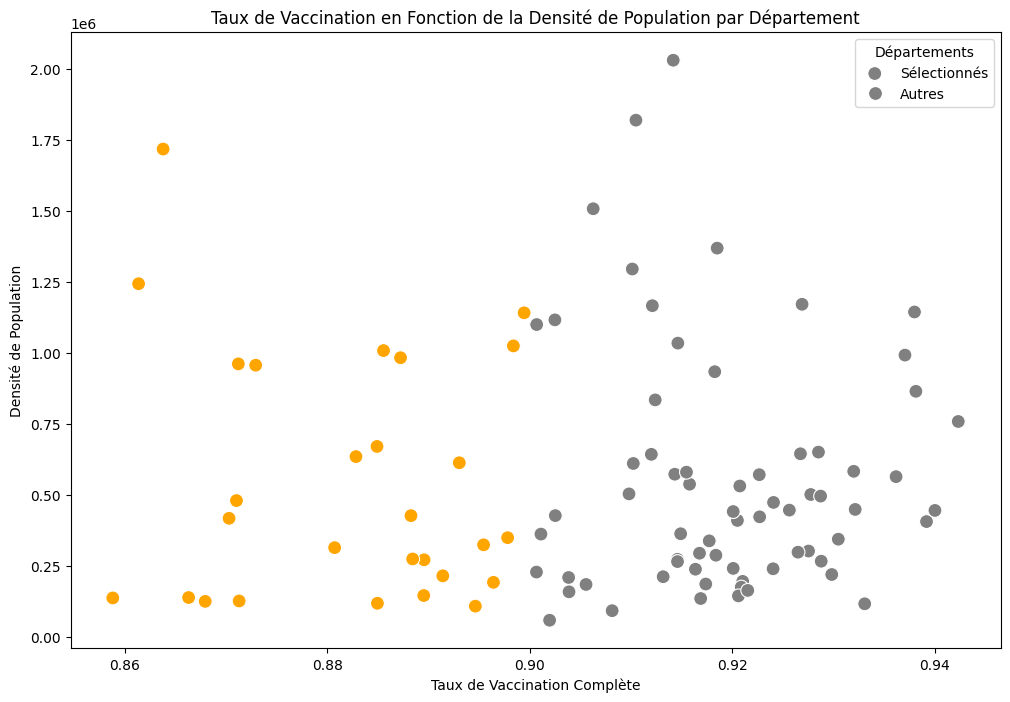

In [81]:
# Attribuons la couleur jaune aux départements dont le taux de vaccination est inférieur au seuil de 90%. 
new['couleur'] = new['libelle_departement'].apply(
    lambda x: 'orange' if x in seuil_inférieur else 'grey'
)

plt.figure(figsize=(12, 8))
sns.scatterplot(data=new, x='taux_termine_pathologie', y='population_ref_cartographie', hue='couleur', palette={'orange': 'orange', 'grey': 'grey'}, s=100)

plt.xlabel("Taux de Vaccination Complète")
plt.ylabel("Densité de Population")
plt.title("Taux de Vaccination en Fonction de la Densité de Population par Département")
plt.legend(title="Départements", labels=["Sélectionnés", "Autres"], loc='upper right')
plt.show()

## Interprétation :
Les départements dont le seuil est inférieur à 90% sont représentés en jaune, les autres sont en gris. On observe un cluster du groupe jaune vers la zone de faible densité de population mais cela est également le cas pour le groupe gris. On ne peut donc pas conclure sur un lien entre faible densité de population et diminuton du taux de vaccination.

# Taux de vaccination initial VS taux de vaccination complet :
Comparons maintenant le taux de vaccination initial (taux_1_inj_pathologie) par rapport au taux de vaccination complet (taux_termine_pathologie) afin de savoir si la série complète de dose est toujours respectée !

Pour cela, effectuons le rapport des deux taux. 
On utilise toujours le dataframe en enlevant les deux pathologies "Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés" et "Toutes pathologies de la catégorie" qui semblent mélanger plusieurs pathologies déjà présentes.

In [103]:
exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]

df2=df.copy()
df2=df2[~ df2['pathologie'].isin(exclusions)]
mask =df2['departement_residence']=='Tout département'
df2=df2[~ mask]
df2['taux_complet_parmi_1ere_dose']=df2['taux_termine_pathologie']/df2['taux_1_inj_pathologie']

min_valeur = df2['taux_complet_parmi_1ere_dose'].min()
max_valeur = df2['taux_complet_parmi_1ere_dose'].max()
print("La valeur minimale est :", min_valeur*100)
print("La valeur maximale est :", max_valeur*100)


La valeur minimale est : 89.89010989010988
La valeur maximale est : 100.0


In [142]:
lignes_min = df2[df2['taux_complet_parmi_1ere_dose'] == min_valeur]
lignes_max = df2[df2['taux_complet_parmi_1ere_dose'] == max_valeur]
N=len(df2['pathologie'].tolist())

print("Il y a ",len(lignes_min['pathologie'].tolist()), "cas sur", N, "qui possède le taux de complétude le plus faible de 89,9%." )
print("Il s'agit de la", lignes_min['pathologie'].tolist()[0], "en",  lignes_min['libelle_departement'].tolist()[0],".")
print("Il y a",len(lignes_max['pathologie'].tolist()),"cas sur", N, "dont le taux de complétude du vaccin est de 100%.")

Il y a  1 cas sur 5000 qui possède le taux de complétude le plus faible de 89,9%.
Il s'agit de la Myopathie ou myasthénie en Guyane .
Il y a 532 cas sur 5000 dont le taux de complétude du vaccin est de 100%.


## Interprétation:
Seulement 10% des départements respecte à 100% la série complète de dose ! Ainsi, dans la plupart des cas, il existe une proportion faible de patients qui commencent à faire la première dose de vaccin mais ne terminent jamais, ce qui rend la vaccination inefficiente et inutile.

Le pire taux de complétude (de 89,9%) est atteint en Guyane pour la myopathie/myasthénie, maladies neurovasculaires qui se caractérisent par une fragilité des muscles. A nouveau, les départements d'Outre-mer sont plus vulnérables à une inefficacité de la prise de vaccin. On peut de la même façon que précedemment faire le lien avec des infrastructures médicales moins développées et des campagnes de préventions limitées par des difficultés économiques et une méfiance locale.

Il faut donc centrer ses efforts sur ces territoires plus isolés et fragiles afin d'atteindre une équité territoriale.